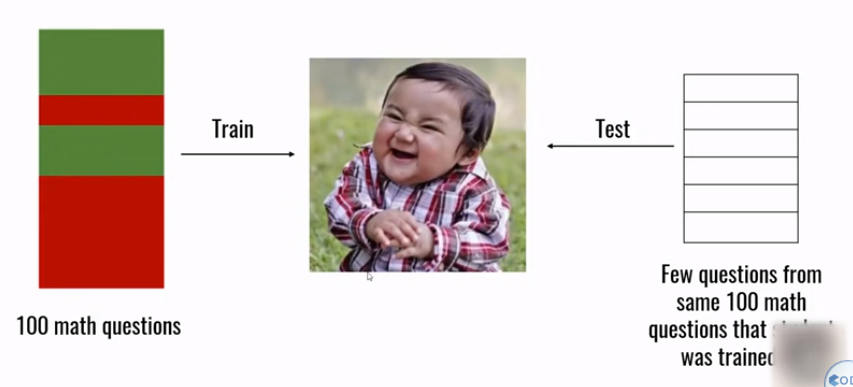

For option 1 for the training and testing sets are the same. This will decrease the accuracy of the model for different situations.

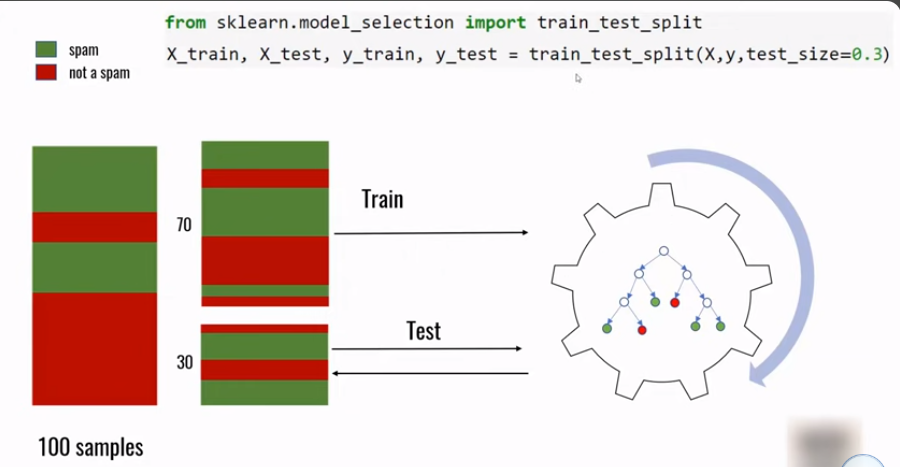

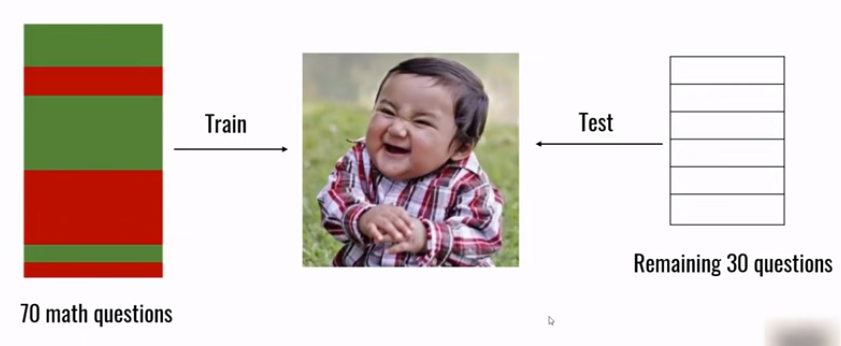

For option 2, data set are divided in two section as train and test. With this option the model can check with different data. However there is a disadvantage of this method. When this method is used if train and the test topics are not proper to each other, accuracy of model can be low.

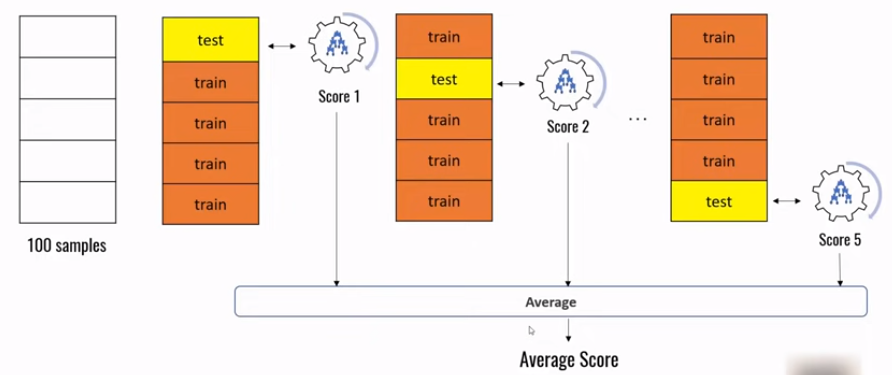

***OPTION-3:*** K fold cross validation is highly effective way to check accuracy of the model. In this method, dataset is divided to subunits. Some of these subunits are selecte as test sets. The final score is calculated as average of the all test scores.

In [29]:
#PROJECT:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [49]:
# MODEL WITH LOGISTIC REGRESSION #
#When you get the max iteration error enlarge the iteration as follow:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9165275459098498

In [50]:
# MODEL WITH SVM #
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9549248747913188

In [51]:
# MODEL WITH RANDOM FOREST CLASSIFIER #
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9232053422370617

In [52]:
# K-FOLD CROSS VALIDATION #
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [53]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [54]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [55]:
# Also, KFold method can be used as follow:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [61]:
scores_lr = []
scores_svm = []
scores_rf = []

#Same function with the code that 2 cells above:
for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    print(get_score(LogisticRegression(max_iter=30000), X_train, X_test, y_train, y_test))
    print(get_score(SVC(), X_train, X_test, y_train, y_test))
    print(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

0.9282136894824707
0.9666110183639399
0.9348914858096828
0.9415692821368948
0.9816360601001669
0.9382303839732888
0.9165275459098498
0.9549248747913188
0.9265442404006677


In [62]:
scores_lr = []
scores_svm = []
scores_rf = []

#Same function with the code that 2 cells above:
for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_lr.append(get_score(LogisticRegression(max_iter=30000), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

In [63]:
scores_lr

[0.9282136894824707, 0.9415692821368948, 0.9165275459098498]

In [64]:
scores_svm

[0.9432387312186978, 0.9565943238731218, 0.9181969949916527]

In [66]:
scores_rf

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [71]:
# 1st argument is classifier, 2nd argument is data(x-values), 3rd argument is output(y-values):
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=3000), digits.data, digits.target)

array([0.925     , 0.87777778, 0.93871866, 0.93593315, 0.89693593])

In [73]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [75]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.92222222, 0.91944444, 0.95264624, 0.95543175, 0.93314763])